<a href="https://colab.research.google.com/github/Noufal21/Handwritten-Digit-Recognition/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install pillow

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K

from matplotlib import pyplot
from matplotlib import cm

import numpy as np


from PIL import Image

In [3]:
# Load Dataset 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# shape of dataset

print("Train : x {0}, y{1}".format(x_train.shape, y_train.shape))
print("Test : x {0}, y{1}".format(x_test.shape, y_test.shape))


11493376/11490434 [==============================] - 0s 0us/step
Train : x (60000, 28, 28), y(60000,)
Test : x (10000, 28, 28), y(10000,)


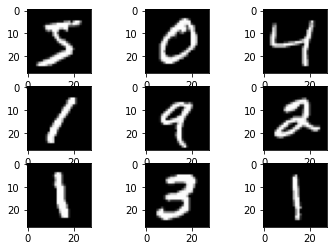

In [4]:
# plot first 10 imagies

for i in range(9):
  pyplot.subplot(3,3,i+1)
  pyplot.imshow(x_train[i],cmap=cm.get_cmap("gray"))

pyplot.show()

In [5]:
def createDataSet():
  (x_train, y_train),(x_test,y_test) = mnist.load_data()

  # shape of dataset

  print("Train : x {0}, y{1}".format(x_train.shape, y_train.shape))
  print("Test : x {0}, y{1}".format(x_test.shape, y_test.shape))
  x_train = x_train.reshape(x_train.shape[0],28,28,1)
  x_test = x_test.reshape(x_test.shape[0],28,28,1)
  input_shape = (28,28,1)
  y_train = keras.utils.to_categorical(y_train)
  y_test = keras.utils.to_categorical(y_test)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')


  x_train /= 255
  x_test /= 255
  print("Train : x {0}, y{1}".format(x_train.shape, y_train.shape))
  print("Test : x {0}, y{1}".format(x_test.shape, y_test.shape))
  return (x_train,y_train),(x_test,y_test),input_shape
(x_train, y_train),(x_test,y_test),input_shape = createDataSet()

input_shape


Train : x (60000, 28, 28), y(60000,)
Test : x (10000, 28, 28), y(10000,)
Train : x (60000, 28, 28, 1), y(60000, 10)
Test : x (10000, 28, 28, 1), y(10000, 10)


(28, 28, 1)

In [6]:
def createModel(batch_size, num_classes,input_shape):
  model = Sequential()
  model.add(Conv2D(32,kernel_size=(5,5),activation= "relu",input_shape = input_shape))
  model.add(Conv2D(64,kernel_size=(3,3),activation= "relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.20))
  model.add(Flatten())
  model.add(Dense(256,activation= 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(learning_rate= 0.1),metrics = ['accuracy'])

  return model
batch_size = 128
num_classes = 10
model = createModel(batch_size,num_classes,input_shape)



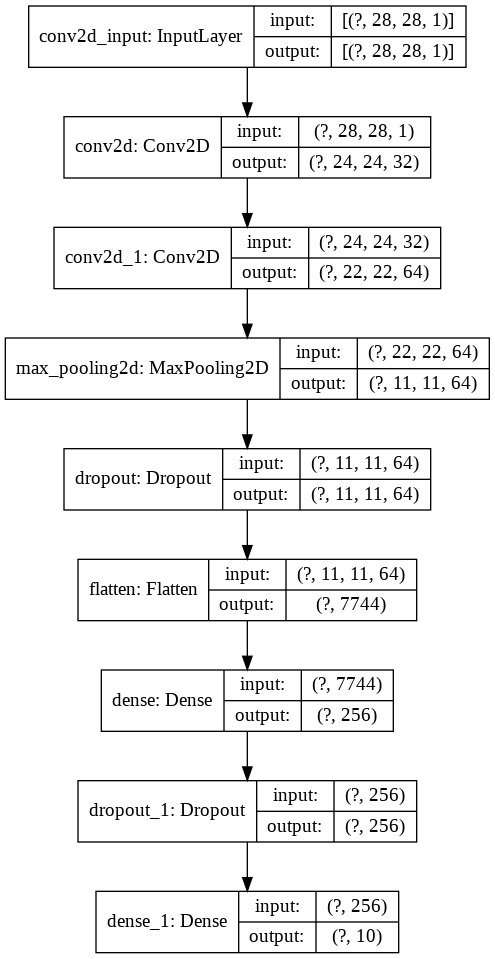

In [7]:
keras.utils.plot_model(model,show_shapes= True,show_layer_names=True)

In [8]:
hist = model.fit(x_train,y_train,batch_size= batch_size,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 4s 9ms/step - loss: 0.5221 - accuracy: 0.8433 - val_loss: 0.1673 - val_accuracy: 0.9509
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1907 - accuracy: 0.9447 - val_loss: 0.1005 - val_accuracy: 0.9686
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1307 - accuracy: 0.9623 - val_loss: 0.0729 - val_accuracy: 0.9759
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1056 - accuracy: 0.9691 - val_loss: 0.0596 - val_accuracy: 0.9802
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0898 - accuracy: 0.9737 - val_loss: 0.0519 - val_accuracy: 0.9829
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0779 - accuracy: 0.9768 - val_loss: 0.0463 - val_accuracy: 0.9841
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 0.0412 - val_accuracy: 0.9856
Epoch 

In [9]:
model.save('mnist.h5')

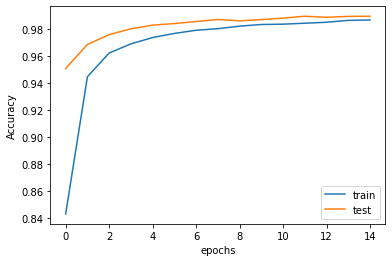

In [10]:
pyplot.plot(hist.epoch,hist.history["accuracy"],label="train")
pyplot.plot(hist.epoch,hist.history["val_accuracy"],label="test")
pyplot.xlabel("epochs")
pyplot.ylabel("Accuracy")
pyplot.legend( loc='lower right')
pyplot.show()

In [11]:
eval = model.evaluate(x_test,y_test)
print("loss : {0} ".format(eval[0]))
print("Accuracy : {0} ".format(eval[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9895
loss : 0.029087450355291367 
Accuracy : 0.9894999861717224 


In [76]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "black";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.strokeStyle = "#FFFFFF";
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def draw(filename='test.png', w=200, h=200, line_width=10):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]

draw()

2741

In [78]:
model = keras.models.load_model('mnist.h5')

(9, 0.5254015)

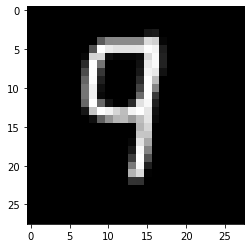

In [79]:
from PIL import Image
def predict_digit(img):
    img = Image.open(img)
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    pyplot.imshow(img,cmap=cm.get_cmap("gray"))
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)


from PIL import Image
predict_digit("test.png")